Loading data...
Data shapes: X_ps1=(2205, 6000), X_ps2=(2205, 6000), y=(2205,)
Combined data shape: (2205, 12000)
Data normalization complete.
Reshaped data for CNN: (2205, 6000, 2)
Splitting data into train and test sets...
Training data shape: (1984, 6000, 2), Testing data shape: (221, 6000, 2)
Creating CNN model...
Model created successfully.
Epoch 1/80
62/62 [==============================] - 83s 1s/step - loss: 1.0123 - accuracy: 0.6316 - val_loss: 0.8345 - val_accuracy: 0.7511
Epoch 2/80
62/62 [==============================] - 66s 1s/step - loss: 0.5213 - accuracy: 0.7928 - val_loss: 0.5024 - val_accuracy: 0.8597
Epoch 3/80
62/62 [==============================] - 67s 1s/step - loss: 0.3178 - accuracy: 0.8896 - val_loss: 0.2745 - val_accuracy: 0.9005
Epoch 4/80
62/62 [==============================] - 60s 964ms/step - loss: 0.2471 - accuracy: 0.9002 - val_loss: 0.2575 - val_accuracy: 0.8643
Epoch 5/80
62/62 [==============================] - 56s 901ms/step - loss: 0.2065 - accur

62/62 [==============================] - 28s 450ms/step - loss: 3.9421e-04 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 56/80
62/62 [==============================] - 28s 454ms/step - loss: 2.0996e-04 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 57/80
62/62 [==============================] - 28s 454ms/step - loss: 6.2594e-04 - accuracy: 1.0000 - val_loss: 6.1661e-04 - val_accuracy: 1.0000
Epoch 58/80
62/62 [==============================] - 28s 450ms/step - loss: 2.2992e-04 - accuracy: 1.0000 - val_loss: 9.7888e-04 - val_accuracy: 1.0000
Epoch 59/80
62/62 [==============================] - 28s 451ms/step - loss: 2.0246e-04 - accuracy: 1.0000 - val_loss: 6.2470e-04 - val_accuracy: 1.0000
Epoch 60/80
62/62 [==============================] - 28s 452ms/step - loss: 1.2223e-04 - accuracy: 1.0000 - val_loss: 3.5295e-04 - val_accuracy: 1.0000
Epoch 61/80
62/62 [==============================] - 28s 451ms/step - loss: 8.6636e-05 - accuracy: 1.0000 - 

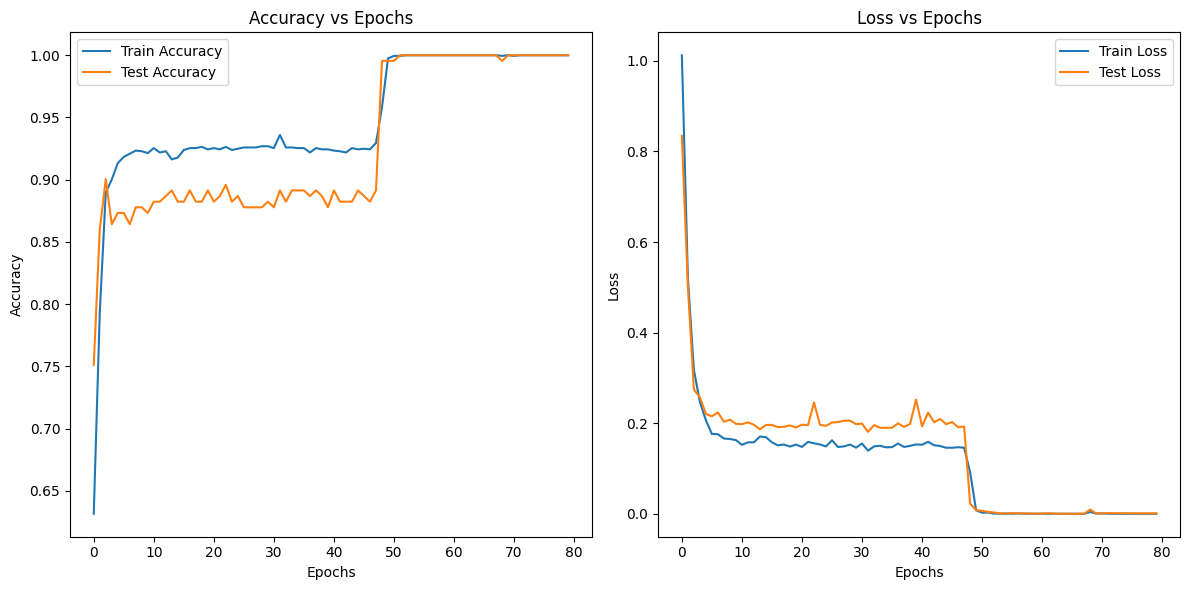

7/7 [==============================] - 1s 86ms/step


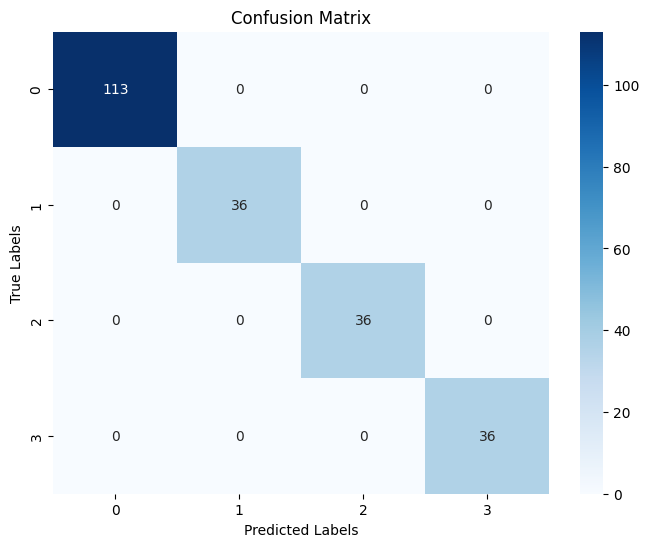

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load and preprocess the data
def load_data():
    print("Loading data...")
    X_ps1 = pd.read_csv(r"C:\Users\HP\Downloads\Mahak_btp\VSCode_FL_Mahak\FL_Valve_Classification\PS1.csv", header=None).values
    X_ps2 = pd.read_csv(r"C:\Users\HP\Downloads\Mahak_btp\VSCode_FL_Mahak\FL_Valve_Classification\PS2.csv", header=None).values
    y = pd.read_csv(r"C:\Users\HP\Downloads\Mahak_btp\VSCode_FL_Mahak\FL_Valve_Classification\valve_target_encoded.csv", header=None).values.flatten()
    print(f"Data shapes: X_ps1={X_ps1.shape}, X_ps2={X_ps2.shape}, y={y.shape}")

    # Combine features from PS1 and PS2
    X_combined = np.concatenate([X_ps1, X_ps2], axis=1)
    print(f"Combined data shape: {X_combined.shape}")

    # Normalize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_combined)
    print("Data normalization complete.")

    # Reshape to (samples, time_steps, features) for CNN input
    X_reshaped = X_scaled.reshape(2205, 6000, 2)  # (samples, time_steps, features)
    print(f"Reshaped data for CNN: {X_reshaped.shape}")

    return X_reshaped, y


# Define the CNN model structure
def create_model(input_shape):
    print("Creating CNN model...")
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=input_shape),
#         tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu', padding='same'),
#         tf.keras.layers.MaxPooling1D(pool_size=2),
#         tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Conv1D(128, kernel_size=3, activation='relu', padding='same'),
        tf.keras.layers.MaxPooling1D(pool_size=2),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Conv1D(256, kernel_size=3, activation='relu', padding='same'),
        tf.keras.layers.MaxPooling1D(pool_size=2),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(4, activation="softmax")  # For 4 classes
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    print("Model created successfully.")
    return model


# Main model training and evaluation
def train_and_evaluate_model():
    # Load data
    X_total, y_total = load_data()

    # Split the data for train and test
    print("Splitting data into train and test sets...")
    X_train, X_test, y_train, y_test = train_test_split(X_total, y_total, test_size=0.10, random_state=104, stratify=y_total)
    print(f"Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")

    # Create model
    model = create_model(input_shape=(6000, 2))

    # Train model
    history = model.fit(X_train, y_train, epochs=80, batch_size=32, validation_data=(X_test, y_test))

    # Evaluate model
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

    # Plot training history (accuracy and loss vs epochs)
    plot_training_history(history)

    # Confusion Matrix
    plot_confusion_matrix(model, X_test, y_test)


# Plot training history (accuracy and loss)
def plot_training_history(history):
    # Plot accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.title('Accuracy vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title('Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


# Plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test):
    y_pred = np.argmax(model.predict(X_test), axis=1)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()


if __name__ == "__main__":
    train_and_evaluate_model()
